## Python Project - Marvel Mart

#### Erick Re
##### March 13, 2022

In [1143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import zip_longest
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

## Part 1: Cleaning the Data

### - Missing Data  

In [1144]:
# I started with the row and column numbers of the csv file I am working with.
# Then, I used an 'isnull' function to identify which columns have missing values.

sales = pd.read_csv(r'C:/Users/erick/BUAN4210/Data/MM_Sales.csv')
print(sales.shape)
sales.isnull().sum()

(50000, 14)


Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64

In [1145]:
# After making a copy of the original file, I filled in the missing values
# with "NULL" using the 'fillna' function. 
# Then, I verified that there no longer missing values. 

salesClean = sales.copy()
salesClean['Item Type'].fillna('NULL', inplace=True)
salesClean['Order Priority'].fillna('NULL', inplace=True)
salesClean.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### - Incorrect Data 

In [1146]:
# Above I have a guide to how I will be identifying incorrect data for
# future reference. 
# I began by identifying erroneous data in 'Country' with 
# a 'try, except' statement, then replacing those values with "NULL". 

count = 0
print("Testing for erronous data in 'Country'")
for index, row in salesClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        salesClean.loc[int(index), 'Country'] = "NULL"
        count+=1
    except:
        1==1
print(f"\nNumber of Erronous data in 'Country':\n{count}")

Testing for erronous data in 'Country'

Number of Erronous data in 'Country':
3


In [1147]:
# To test for erronous data in 'Item Type', I returned each individual 
# value with a 'value_count' function. 
# From there, I was able to identify if there were any irregular item types
# or counts.

count = 0

print("Testing for erronous data in 'Item Type'\n")
print(salesClean['Item Type'].value_counts())

Testing for erronous data in 'Item Type'

Meat               4221
Fruits             4221
Cosmetics          4192
Vegetables         4189
Personal Care      4185
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Household          4138
Office Supplies    4138
Baby Food          4078
NULL                  6
Name: Item Type, dtype: int64


In [1148]:
# Testing for erronous data in 'Order Priority' required another 'try,except'
# statement, but I incorporated an if statement to test each acceptable type.

count = 0

print("Testing erronous data in 'Order Priority'")

for index, row in salesClean.iterrows():
    try:
        row.loc['Order Priority'] = float(row.loc['sex'])
        salesClean.loc[int(index), 'Order Priority'] = 0
        print(salesClean.loc[int(index), 'Order Priority'])
        count+=1
    except:
        def test(letter):
            test = (row.loc['Order Priority'] != [letter.items()])
            letter = ['C', 'H', 'M', 'L', 'NULL']
            if test:
                salesCleans.loc[int(index), 'Order Item'] = "NULL"
                print(salesClean.loc[int(index), 'Order Priority'])
                count+=1
            
print(f"Number of erronous data in 'Order Priority': {count}")

Testing erronous data in 'Order Priority'
Number of erronous data in 'Order Priority': 0


In [1149]:
# For 'Order ID', I tested if there were any floats by 
# converted all data into integers and if they failed, 
# they would be replaced with "NULL"

count = 0 

print("Testing erronous data in 'Order ID'")
for index, row in salesClean.iterrows():
    try:
        row.loc['Order ID'] = int(row.loc['Order ID'])
    except:
        salesClean.loc[float(index), 'Order ID'] = "NULL"
        count+=1
        
print(f"Number of erronous data in 'Order ID': {count}")

Testing erronous data in 'Order ID'
Number of erronous data in 'Order ID': 5


### - Data Cleaning

In [1150]:
# I have the original data's row and column count for reference
# so that the count of clean rows matches the amount of missing and incorrect
# data I identified. 
# I did this by adding all data that is not "NULL' to a new variable.

print(salesClean.shape)
salesClean = salesClean[salesClean['Country'] != 'NULL']
salesClean = salesClean[salesClean['Item Type'] != 'NULL']
salesClean = salesClean[salesClean['Order ID'] != 'NULL']
salesClean = salesClean[salesClean['Order Priority'] != 'NULL']
print(salesClean.shape)
                        

(50000, 14)
(49971, 14)


In [1151]:
# Here, I am transfering the cleaned data to a new file using a 'to' function.
# Then, I verified the row and column count were correct.

salesClean.to_csv("C:/Users/erick/BUAN4210/Data/MM_SalesClean.csv", index = False)
newSales = pd.read_csv("C:/Users/erick/BUAN4210/Data/MM_SalesClean.csv")
print(newSales.shape)

(49971, 14)


## Part 2: Data Analysis




### 1.  Countries with the Most Sales

1.1 - Top Countries We Sell to

                             Country  Sale Count
1                Trinidad and Tobago         321
2                             Guinea         318
3                         Cape Verde         314
4                           Maldives         311
5                            Finland         310
6   Democratic Republic of the Congo         308
7                             Samoa          306
8                              Malta         305
9                              China         303
10                       South Sudan         302




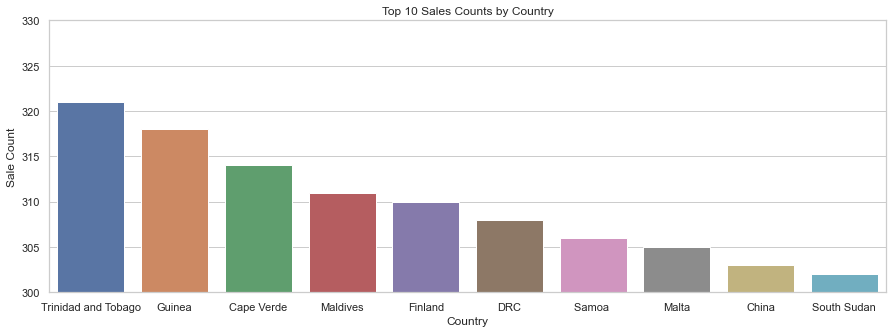

In [1152]:
# To find the top ten countries we sell to, I created a sorted variable that
# descends in value, then returned only the first ten rows. 
# I added the list for easy reference, and so that 'DRC' on the chart
# is identifiable.
# It is important to note that the visualization begins at a count of 300.

count = newSales.groupby(['Country'])['Units Sold'].count()
rank = sorted(count.items(), key=lambda item: item[1], reverse=True)
rank = rank[0:10]
df = pd.DataFrame(rank, columns = ['Country', 'Sale Count'])
df.index += 1
print(df)

df.Country = df.Country.replace(['Democratic Republic of the Congo'], 'DRC')
print('\n')

sns.set(style='whitegrid')
plt.figure(figsize=(15,5))
plt.ylim(300, 330)
plt.title('Top 10 Sales Counts by Country')
ax = sns.barplot(df.Country, df['Sale Count'])


1.2 - Recording the Results

In [1153]:
# As the first addition to the Ranks file, I used a writing argument
# to add to the file. 

with open("C:/Users/erick/BUAN4210/Data/MM_Ranks.txt", 'w+') as writer:
    writer.write(f"Countries With Most Sale Transactions:\n")
    for index, row in df.iterrows():
        results = (f"{row.loc['Country']}: {row.loc['Sale Count']}\n")
        writer.write(results[0:])
    writer.write(f"The country we should build our shipping center in is Cape Verde because it"
                 " has the third highest count of sale transactions. Cape Verde even surpasses"
                 " the Maldives in count, which already has a shipping center.\n")
       

### 2. Order Types

2.1 - Sales Channel Types

In [1170]:
# I used 'value_count' function to find the counts for
# each sales channel. 

line = newSales['Sales Channel'].value_counts()
print(f"Sale Count by Channel:\n{line}\n")

Sale Count by Channel:
Online     30183
Offline    19788
Name: Sales Channel, dtype: int64



2.2 - Order Priority Types

In [1169]:
priority = newSales['Order Priority'].value_counts()
print(f"Sale Count by Priority:\n{priority}\n")

Sale Count by Priority:
M    19881
H    15094
L     9984
C     5012
Name: Order Priority, dtype: int64



2.3 - Sales Channel and Order Priority Visualizations

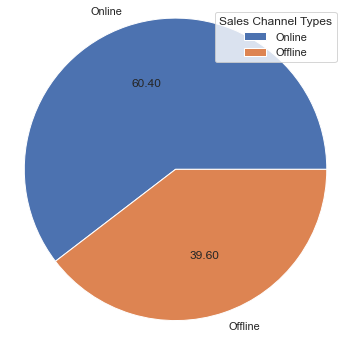

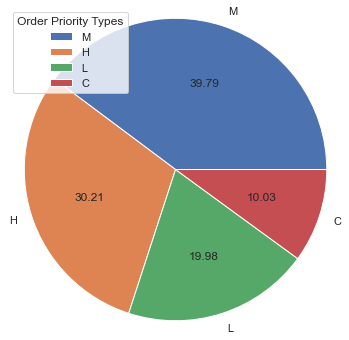

In [1156]:
# These visuals were made with matplotlib showing the distribution
# for the data returned previously. 
# They differ in location so that the legends don't cover the chart.

plt.figure(figsize=(6,6))
plt.pie(line, labels=line.index, autopct='%.2f')
plt.axis('equal') 
plt.legend(loc=1, title='Sales Channel Types')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(priority, labels=priority.index, autopct='%.2f')
plt.axis('equal') 
plt.legend(loc=2, title='Order Priority Types')
plt.show()

2.4 - Recording the Results

In [1157]:
# I used a loop to go through each variable and add their respective
# data to the Ranks file. 

with open("C:/Users/erick/BUAN4210/Data/MM_Ranks.txt", 'a+') as add:
    add.write(f"\nSales Channels:\n")
    for x, y in line.items():
        add.write(f"{x} at {y} sales\n")
    add.write(f"We do more online sales.\n"
              "\nOrder Priorities:\n")
    for x, y in priority.items():
        add.write(f"{x} at {y} sales\n")
    add.write(f"We do more M-order priorities.\n")

### 3. Profitability of Item Types

3.1 - Total Profits Distribution

Text(0, 0.5, 'Total Profit ($M)')

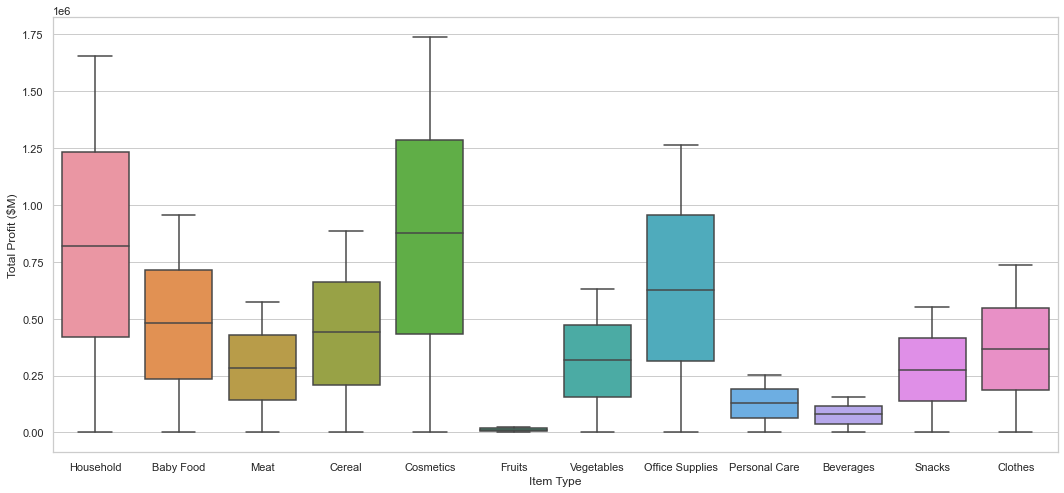

In [1172]:
# To visualize the distribution of total profit by item type, I just referenced them while
# creating the boxplot with seaborn.
# The chart is in millions of dollars. 

plt.figure(figsize=(18,8))
ax = sns.boxplot(newSales['Item Type'], newSales['Total Profit'])
plt.ylabel('Total Profit ($M)')

3.6 -
The boxplots above display the distribution of total profits, in millions of dollars, of each item type that Marvel Mart sells. From the twelve item types, Cosmetics and Household items demonstrate the highest distribution in total profits, meaning that each sale transaction of these items varies the most in profit made. These numbers are not surprising because household items are diverse and cosmetics tend to have cheaper alternatives. Since personal care is similar to cosmetics, it may be beneficial for Marvel Mart to widen the selection of personal care products to close the 1.5 million dollar distribution gap between the two item types. Similarly, fruit has an unusually small distribution of less than 250,000 dollars. Although this may be because of the price difference of fruit items and other, this still suggests a lack of higher profit from fruit items. This means that Marvel Mart may need to either widen the selection of fruit or stop offering it at all, depending on the cost we incur in buying fruit items. 



3.2 - Total Profit By Item Type

In [1159]:
# To find the sum of total profit by item type, I had to use a 'groupby' and 'sum' function.
# I created a data frame for easier readability.

profit = newSales.groupby(['Item Type'])['Total Profit'].sum()
profitDF = pd.DataFrame(profit.items(), columns=['Item Type', 'Total Profit'])
profitDF.index += 1
print(profitDF)

          Item Type   Total Profit
1         Baby Food 1942865748.120
2         Beverages  327559249.080
3            Cereal 1824726412.290
4           Clothes 1520832019.680
5         Cosmetics 3638407966.750
6            Fruits   51010570.920
7         Household 3401180998.060
8              Meat 1196342404.400
9   Office Supplies 2605440187.500
10    Personal Care  535250525.600
11           Snacks 1149715758.720
12       Vegetables 1322639660.240


3.3 - Visualizing Total Profits

Text(0, 0.5, 'Total Profits ($B)')

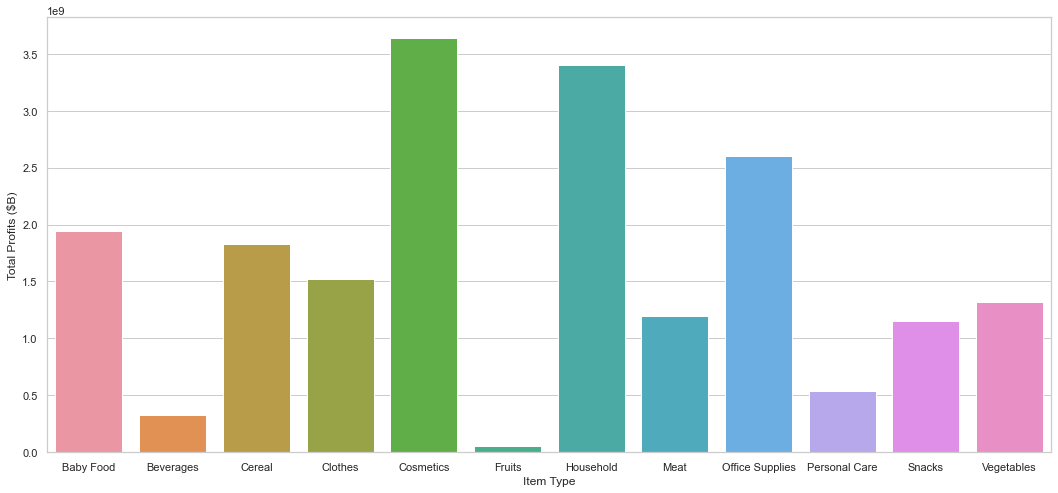

In [1171]:
# Here, I just reference the data frame I made by column to created the bar plot
# with seaborn. 

plt.figure(figsize=(18,8))
ax = sns.barplot(profitDF['Item Type'], profitDF['Total Profit'])
plt.ylabel('Total Profits ($B)')

3.4 - Most Profited Items

In [1161]:
# I sorted the list here by descending value then returned the first three values.

rank = sorted(profit.items(), key=lambda item: item[1], reverse=True)
rankDF = rank[0:3]
for x, y in rankDF:
    print(x, y)

Cosmetics 3638407966.75
Household 3401180998.06
Office Supplies 2605440187.5


3.5 - Recording the Results

In [1162]:
with open("C:/Users/erick/BUAN4210/Data/MM_Ranks.txt", 'a+') as add:
    add.write(f"\nHighest Selling Item:")
    for x, y in rankDF:
        add.write(f"\n{x}: {y}")
    add.write(f"\nWe profited from Cosmetics, Household, and Office Supply items"
              " the most out of our item types. These item types were ahead of others"
              " by about half a billion dollars in total profits.\n")


### 4. Descriptive Statistics

4.1, 4.2, 4.3 - Sums, Averages, and Maximums 

In [1163]:
# I decided to create a dictionary that contains the sum, average, and maximum by each column
# I am analyzing. 
# From there, I created a data frame for readability, and printed each column.

col = [newSales['Units Sold'], 
       newSales['Unit Cost'], 
       newSales['Total Revenue'], 
       newSales['Total Cost'], 
       newSales['Total Profit']]
col = {'Sum': [col[0].sum(), col[1].sum(), col[2].sum(), col[3].sum(), col[4].sum()],
       'Average': [col[0].mean(), col[1].mean(), col[2].mean(), col[3].mean(), col[4].mean()],
       'Maximum': [col[0].max(), col[1].max(), col[2].max(), col[3].max(), col[4].max()]}
colDF = pd.DataFrame(col, index=['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'])
print(f"Sum:\n\n{colDF.Sum}")
print(f"\nMean:\n\n{colDF.Average}")
print(f"\nMaximum:\n\n{colDF.Maximum}")

Sum:

Units Sold        249818150.000
Unit Cost           9360768.320
Total Revenue   66145004417.170
Total Cost      46629032915.810
Total Profit    19515971501.360
Name: Sum, dtype: float64

Mean:

Units Sold         4999.263
Unit Cost           187.324
Total Revenue   1323667.816
Total Cost       933121.869
Total Profit     390545.947
Name: Average, dtype: float64

Maximum:

Units Sold        10000.000
Unit Cost           524.960
Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
Name: Maximum, dtype: float64


4.3 - Visualizing the Results

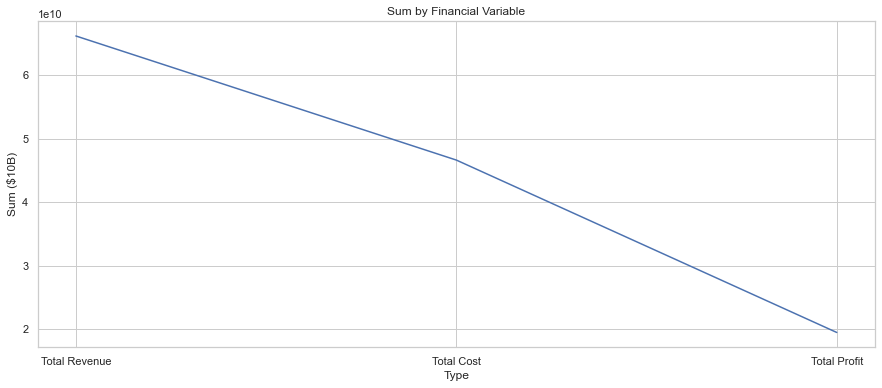

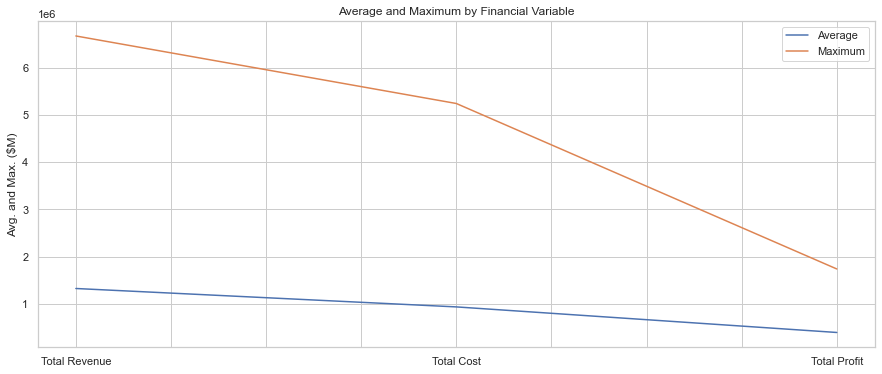

In [1173]:
# To take out 'Units Sold' and 'Unit Cost' from the visuals, I created a copy 
# of the data frame then used a 'drop function'.
# From there, I reference each column for data in each line chart. 
# The Sum chart is measured in tens of billions of dollars, 
# while average and maximum are in millions.

newCol = colDF.copy()
newCol.drop(index=['Units Sold', 'Unit Cost'], inplace = True)
plt.figure(figsize=(15,6))
plt.plot(newCol.Sum.index, newCol.Sum.values)
plt.title('Sum by Financial Variable')
plt.xlabel('Type')
plt.ylabel('Sum ($10B)')
plt.show()

newCol.plot( y=['Average', 'Maximum'], kind='line', figsize=(15,6))
plt.title('Average and Maximum by Financial Variable')
plt.ylabel('Avg. and Max. ($M)')
plt.show()

4.5 - Recording the Results

In [1165]:
with open("C:/Users/erick/BUAN4210/Data/MM_Calc.txt", 'w+') as writer:
    writer.write(f"Sums:\n\n{colDF.Sum}\n"
                 f"\nAverages:\n\n{colDF.Average}\n"
                 f"\nMaximums:\n\n{colDF.Maximum}\n")


## Part 3: Cross Reference Statistics

### 1. Countries in Each of Our Regions

In [1166]:
# I created a  ditionary then used an 'if, else' statement to add region as a key
# and its countries as values. 
# Then I printed the organized data using a 'get' functionf for the dictionary. 

dictRegion = {}
for index, row in newSales.iterrows():
    if row.loc['Region'] in dictRegion:
        dictRegion[row.loc['Region']].add(row.loc['Country'])
    else:
        dictRegion[row.loc['Region']] = set()
        dictRegion[row.loc['Region']].add(row.loc['Country'])
for key in dictRegion.keys():
    print("{}:\n {}\n".format(key, dictRegion.get(key)))

Sub-Saharan Africa:
 {'Senegal', 'Uganda', 'Chad', 'Equatorial Guinea', 'Ethiopia', 'Zambia', 'Djibouti', 'Sierra Leone', 'Gabon', 'Sudan', 'Mozambique', 'Guinea', 'Lesotho', 'Swaziland', 'Liberia', 'Cameroon', 'Nigeria', 'Togo', 'Democratic Republic of the Congo', 'Burundi', 'Comoros', 'Seychelles ', 'Mali', 'Rwanda', "Cote d'Ivoire", 'Niger', 'Tanzania', 'Angola', 'South Africa', 'Namibia', 'Benin', 'Ghana', 'Burkina Faso', 'Eritrea', 'Mauritius ', 'The Gambia', 'Zimbabwe', 'Guinea-Bissau', 'Republic of the Congo', 'Botswana', 'Malawi', 'Sao Tome and Principe', 'Mauritania', 'Kenya', 'Madagascar', 'South Sudan', 'Central African Republic', 'Cape Verde'}

Europe:
 {'Belgium', 'Russia', 'Luxembourg', 'Serbia', 'Cyprus', 'Bulgaria', 'Bosnia and Herzegovina', 'Netherlands', 'Georgia', 'San Marino', 'Slovakia', 'Poland', 'Malta', 'Hungary', 'Italy', 'Croatia', 'Denmark', 'France', 'Portugal', 'Spain', 'Albania', 'Germany', 'Monaco', 'Iceland', 'Finland', 'Austria', 'United Kingdom', 'Roma

### 2. Recording the Results

In [1167]:
# In order to add the dictionary into a file, I started by adding the keys, or regions, into the file. 
# Then, I put the values, by region, in a variable
# so that I could add them to their respective key within the file by using
# a 'zip_longest' function.

country = dictRegion.values()
with open("C:/Users/erick/BUAN4210/Data/Countries_By_Region.csv", 'w+') as file:
    writer = csv.writer(file)
    writer.writerow(dictRegion.keys())
    for countries in zip_longest(*country):
        writer.writerow(countries)